In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
import pandas as pd
import time
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
df = pd.read_csv('/content/drive/MyDrive/deepq_ai_assignment_data.csv')

In [126]:
df.describe()

,X1,X11,X12,X13,X14,X15,X17,X19,X20,X21,...,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215
count,167020.000000,0.0,167020.000000,167020.0,167020.0,167020.0,167020.000000,167020.000000,167020.000000,167020.000000,...,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000
mean,1878.648610,NaN,1872.815329,0.0,0.0,1.0,12.392115,2.411262,11.287157,4.622363,...,-0.191350,0.620998,-0.491109,2.370653,-0.337103,1.023248,2.181642,0.922200,1.238324,0.492449
std,1003.774399,NaN,940.009881,0.0,0.0,0.0,0.958821,2.274932,5.313206,1.771505,...,1.232168,2.286550,0.495994,4.718393,0.775096,0.361508,3.615738,0.503004,0.660264,0.381383
min,0.000000,NaN,50.000000,0.0,0.0,1.0,11.000000,1.000000,1.000000,1.000000,...,-3.480000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.048450,0.000000,-0.041667,-1.000000
25%,1233.000000,NaN,1240.000000,0.0,0.0,1.0,12.000000,1.000000,7.000000,3.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.365692,0.500000,0.812903,0.400000
50%,1601.000000,NaN,1600.000000,0.0,0.0,1.0,12.000000,2.000000,12.000000,5.000000,...,-0.333333,0.000000,0.000000,0.000000,0.000000,1.000000,1.830507,1.000000,1.472656,0.571429
75%,2250.000000,NaN,2234.000000,0.0,0.0,1.0,13.000000,3.000000,15.000000,6.000000,...,0.275000,1.500000,0.000000,4.500000,0.000000,1.000000,2.525475,1.000000,1.690566,0.705882
max,37576.000000,NaN,13055.000000,0.0,0.0,1.0,15.000000,23.000000,35.000000,14.000000,...,129.250000,30.666667,0.000000,55.000000,25.500000,3.000000,1399.000000,4.000000,2.293011,1.000000


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167020 entries, 0 to 167019
Columns: 217 entries, UID to X215
dtypes: bool(1), float64(89), int64(97), object(30)
memory usage: 275.4+ MB


In [128]:
df.columns.values

array(['UID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27',
       'Target_ChurnFlag', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34',
       'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43',
       'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52',
       'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70',
       'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79',
       'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88',
       'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97',
       'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105',
       'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113',
       'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X121',
       'X122', '

In [129]:
with pd.option_context('display.max_rows', 10, 'display.max_columns', None): 
    display(df)

,UID,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,Target_ChurnFlag,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X188,X189,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215
0,1003904-3746,14 month lease,1103.0,2015-01-08,2016-02-28,2015-07-30,2015-01-08,2015-01-08,2015-07-30,2015-07-01,NaN,False,NaN,1103.0,0,0,1,NaN,13,1-3 years,1,16,6,1,0,0,0,0,1,1,2016,2015-01-08,2015-07-30,0,0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2206.00,-1.0,-1.000000,1,1,1,0,1,0,1,0,0,1,25,NaN,NaN,46.120308,25.0,25,25,0,1,42000.0,NaN,9,4,8,0,0,1,1,1,2,714.0,714.0,1.0,1.0,-1,-1,-1.000000,-1,-1,-1,-1,-1.000000,-1,-1,-1,-1,15,0,9,11.133333,5,14,1,7,0.555556,5,0,9,0,40004,240,ACTIVE,Riverside,CA,92507-8463,40004,Other SoCal,B,Garden,suburban,University City/Moreno Valley,0,312,16,71,399,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,0.9535,1144.0,0.007000,2015-Q1,2015-01-01,1249.0,1249.0,0.883106,0.883106,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.466667,0.037037,0.333333,0.0,0.600000,0.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,1.0,1.544818,1.000000,1.662500,0.600000
1,1003904-3751,12 month lease,1136.0,2015-01-24,2016-01-17,NaN,2003-09-11,2003-09-11,NaN,NaN,NaN,False,NaN,1136.0,0,0,1,2016-01-18,12,6-12 months,13,15,7,0,0,0,0,0,1,0,2016,2015-01-24,2016-01-17,0,0,1103.0,0.029918,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1,1,1,1,0,0,1,1.000000,0.000000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2272.00,-1.0,-1.000000,1,1,1,0,1,0,0,1,0,1,46,NaN,NaN,-1.000000,46.0,46,46,0,0,0.0,NaN,9,4,8,0,0,1,1,1,2,714.0,714.0,1.0,1.0,0,7,8.285714,4,12,0,16,0.176471,7,0,17,1,14,0,2,8.214286,4,13,0,16,0.176471,7,0,17,1,40004,240,ACTIVE,Riverside,CA,92507-8463,40004,Other SoCal,B,Garden,suburban,University City/Moreno Valley,0,312,16,71,399,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,0.9535,1144.0,0.007000,2015-Q1,2015-01-01,1249.0,1249.0,0.909528,0.909528,0.083333,0.083333,0.083333,0.083333,0.000000,0.000000,0.083333,0.083333,0.000000,0.083333,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.142857,0.012605,0.500000,0.0,1.214286,0.071429,1.230769,0.013575,0.538462,0.0,1.307692,0.076923,1.0,1.591036,1.000000,1.662500,0.142857
2,1003904-3756,12 month lease,1382.0,2015-02-20,2016-02-21,2016-02-21,2015-02-20,2015-02-20,NaN,NaN,NaN,False,NaN,1382.0,0,0,1,2016-02-22,12,6-12 months,1,14,7,1,0,0,0,0,1,0,2016,2015-02-20,2016-02-21,0,0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2764.00,-1.0,-1.000000,3,3,2,1,2,1,1,1,0,2,41,Full Time Homemaker,Retired,0.000000,44.0,41,47,1,2,66360.0,Full Time Homemaker,18,5,16,2,0,1,1,1,1,1060.0,1060.0,2.0,2.0,-1,-1,-1.000000,-1,-1,-1,-1,-1.000000,-1

In [130]:
df['UID'].unique().shape

(167020,)

In [131]:
df['UID'].isna().sum()

0

**No missing Unique_id**

In [132]:
df.dtypes[df.dtypes=='object']

UID     object
X0      object
X2      object
X3      object
X4      object
X5      object
X6      object
X7      object
X8      object
X9      object
X16     object
X18     object
X30     object
X31     object
X99     object
X100    object
X108    object
X149    object
X150    object
X151    object
X152    object
X154    object
X155    object
X156    object
X157    object
X158    object
X164    object
X165    object
X169    object
X170    object
dtype: object

In [133]:
df.dtypes[df.dtypes=='object'].shape

(30,)

**Observation : Number of columns with mix data-types are 30**

In [134]:
columns_with_one_value = []
for i in df.columns:
    if len(df[i].value_counts())==1:
        columns_with_one_value.append(i)

print(columns_with_one_value)

['X10', 'X13', 'X14', 'X15', 'X25', 'X26', 'X27', 'X32', 'X33', 'X45', 'X46', 'X48', 'X69', 'X72', 'X149', 'X186', 'X189']


Thus features shown above contain a same value for each data_points thus can be dropped

<Figure size 720x288 with 0 Axes>

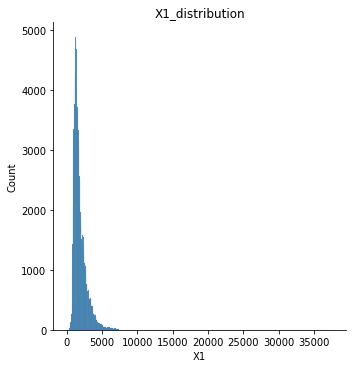

In [135]:
# ploting X1 distribution
plt.figure(figsize=(10,4))
sns.displot(df.X1)
plt.title('X1_distribution')
plt.show()

In [136]:
strip_lease_month = lambda x:int(re.findall(r'-?\d+\.?\d*', x)[0])

In [137]:
import gc
gc.collect()

389329

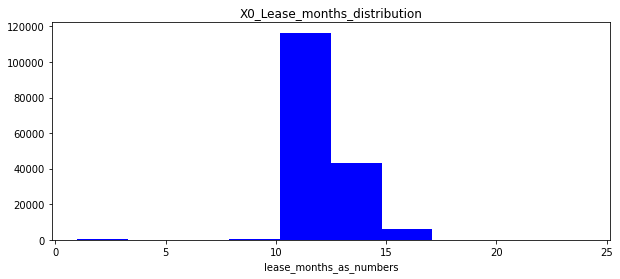

In [138]:
# ploting X1 distribution
plt.figure(figsize=(10,4))
#sns.displot(df['X0'].map(strip_lease_month), color='b')

plt.hist(df['X0'].map(strip_lease_month), color='b')
plt.title('X0_Lease_months_distribution')
plt.xlabel('lease_months_as_numbers')
plt.show()

In [139]:
df['X0'].map(strip_lease_month).value_counts()

12    111206
14     23986
13     19351
15      5897
11      5153
3        436
10       287
16       240
7        130
9         97
6         81
8         56
2         44
4         31
5         17
24         3
18         2
17         2
1          1
Name: X0, dtype: int64

Most occured lease months are in between the range of 12 to 15 and 12 is the having the heighest frequency in that.

In [140]:
extract_month = lambda date : int(date.split('-')[1])

In [141]:
dates_containing_features = ['X2', 'X3', 'X5', 'X6', 'X30', 'X31', 'X170']
def variation_of_months_in_features_having_dates(features, df):
    for feature in features: 
        try: 
            # ploting feature distribution
            plt.figure(figsize=(15,6))
            sns.displot(df[feature].map(extract_month))
            plt.title(f'Variation of months in feature {feature}')
            plt.xlabel('months_as_numbers')
            plt.show()
        
        except:
            print(feature)

<Figure size 1080x432 with 0 Axes>

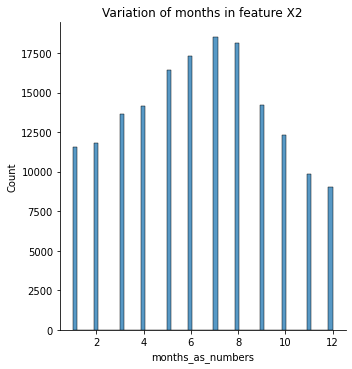

<Figure size 1080x432 with 0 Axes>

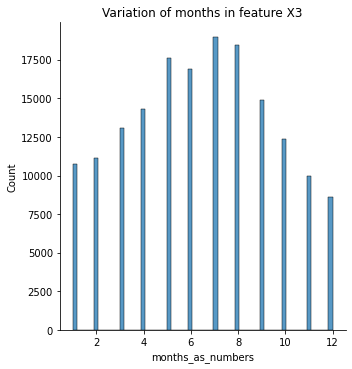

<Figure size 1080x432 with 0 Axes>

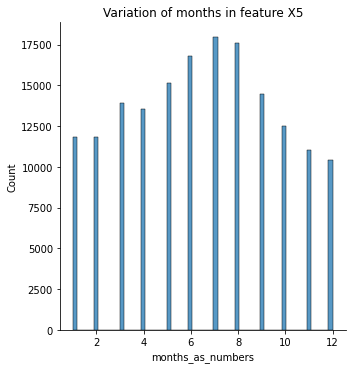

<Figure size 1080x432 with 0 Axes>

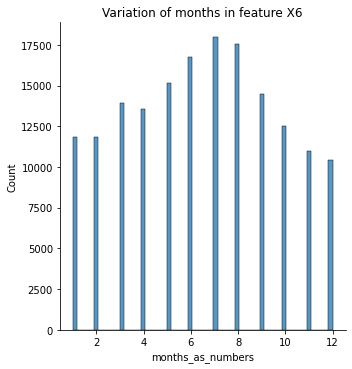

<Figure size 1080x432 with 0 Axes>

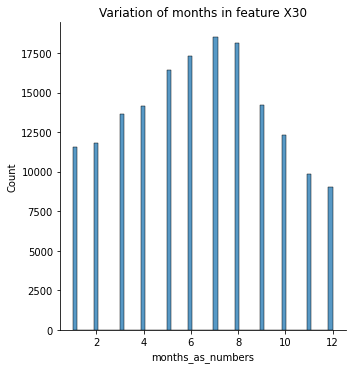

<Figure size 1080x432 with 0 Axes>

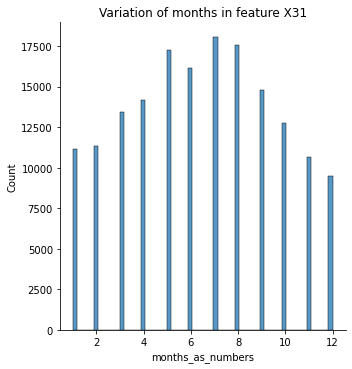

<Figure size 1080x432 with 0 Axes>

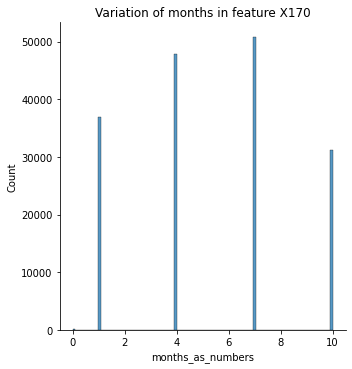

In [142]:
date_df = df[dates_containing_features].fillna('0-0-0')
variation_of_months_in_features_having_dates(dates_containing_features, date_df)

Mid of the year i.e. month numbers 6,7 and 8 contains more number of observations than other months

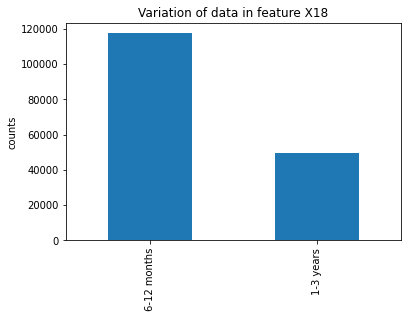

In [143]:
df['X18'].value_counts().plot.bar()
plt.title('Variation of data in feature X18')
plt.ylabel('counts')
plt.show()

Most of the data points have value of feature X18 as 6-12 months

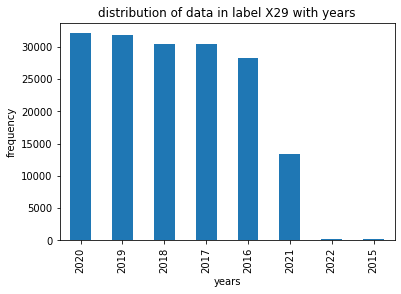

In [144]:
plt.title('distribution of data in label X29 with years')
df['X29'].value_counts().plot.bar()
plt.xlabel('years')
plt.ylabel('frequency')
plt.show()

Less data points are available in past two years i.e. 2021 and 2022 as compared to the previous years

In [145]:
df['X169'].value_counts()

2019-Q3    10665
2018-Q3    10252
2016-Q3     9785
2017-Q3     9714
2015-Q3     9273
2018-Q2     8865
2019-Q2     8851
2017-Q2     8762
2016-Q2     8549
2015-Q2     7971
2018-Q4     6407
2019-Q1     6366
2018-Q1     6213
2017-Q1     6209
2016-Q4     6200
2016-Q1     6161
2019-Q4     6143
2017-Q4     6131
2020-Q1     6027
2015-Q4     5924
2015-Q1     5857
2020-Q2     4878
2020-Q3     1115
2020-Q4      389
2021-Q1      145
2021-Q2       23
Name: X169, dtype: int64

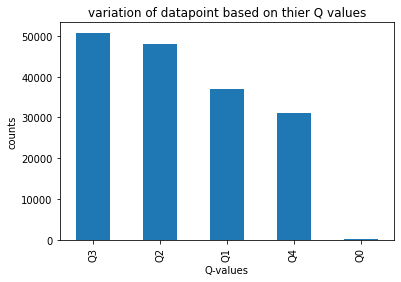

In [146]:
extracting_quaters = lambda x : x.split('-')[-1]
df['X169'].fillna('Q0-Q0').map(extracting_quaters).value_counts().plot.bar()
plt.title('variation of datapoint based on thier Q values')
plt.ylabel('counts')
plt.xlabel('Q-values')
plt.show()

Least number of data-points are having 'Q4' in it, whereas Q0 define the number of missing values.



In [147]:
string_containing_features = ['X150', 'X151', 'X152', 'X154', 'X155', 'X156', 'X157','X158', 'X164', 'X165']
def variation_of_months_in_features_having_dates(features, df):
    for feature in features: 
        try: 
            # ploting feature distribution
            plt.figure(figsize=(25,6))
            df[feature].value_counts().plot.bar()
            plt.title(f'Variation of data in feature {feature}')
            plt.xlabel('Distinct values')
            plt.ylabel('Frequency')
            plt.show()
        
        except:
            print(feature)

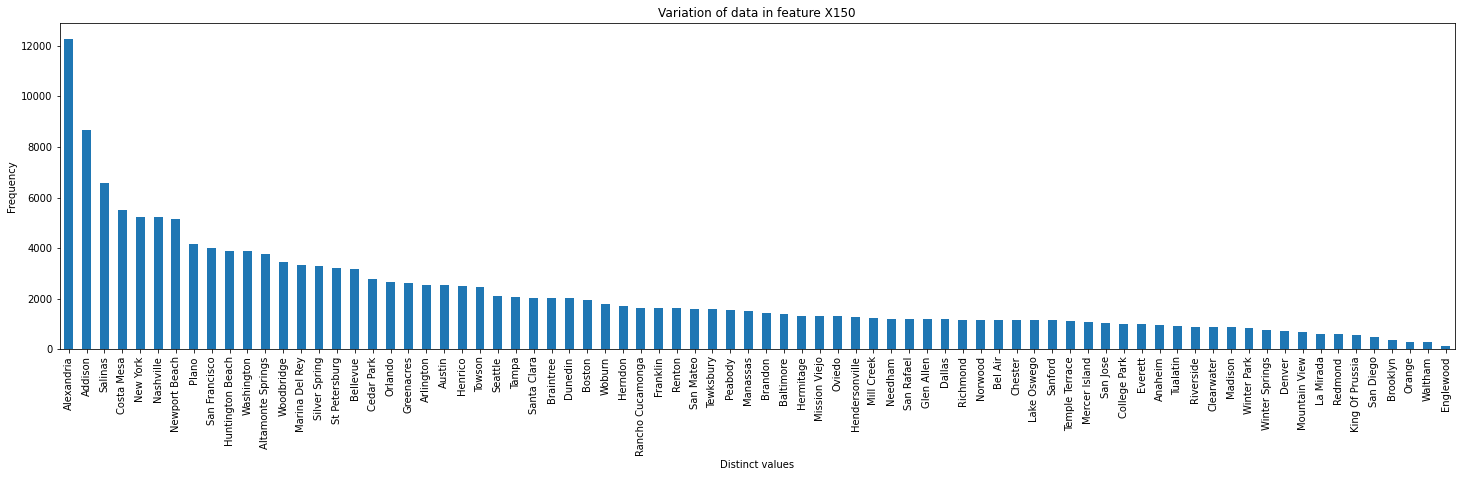

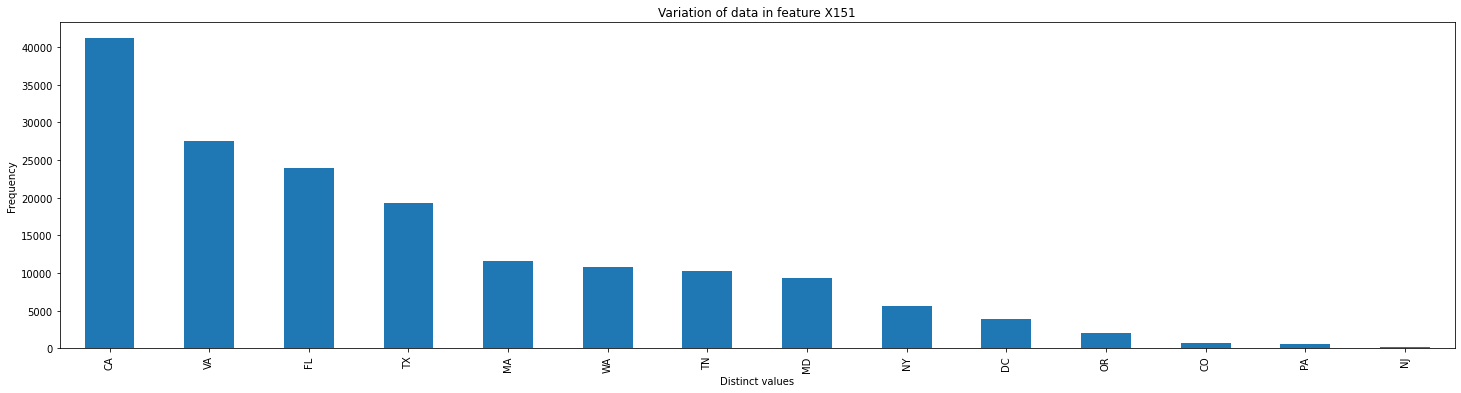

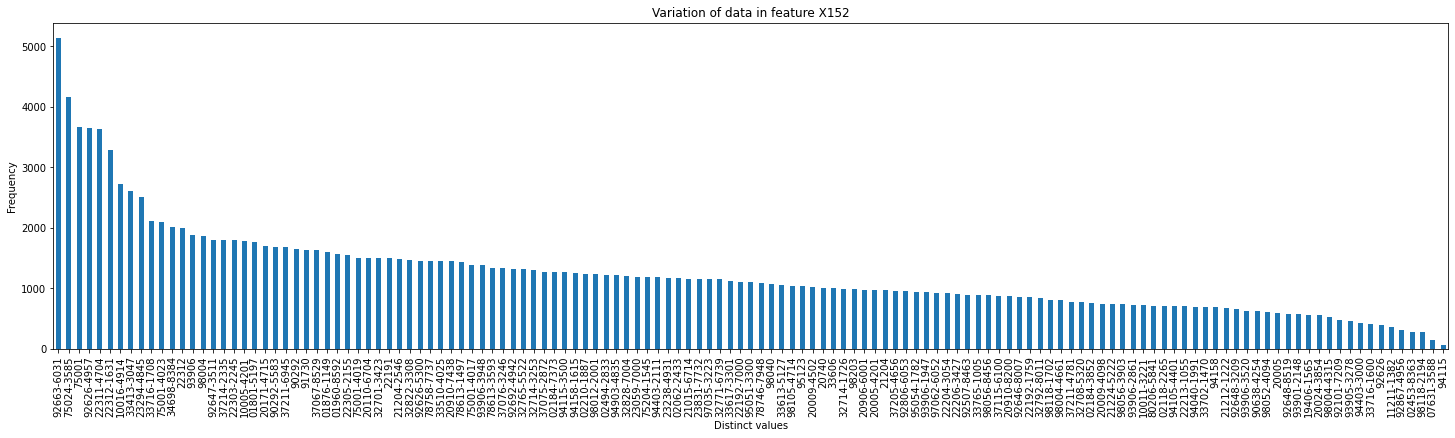

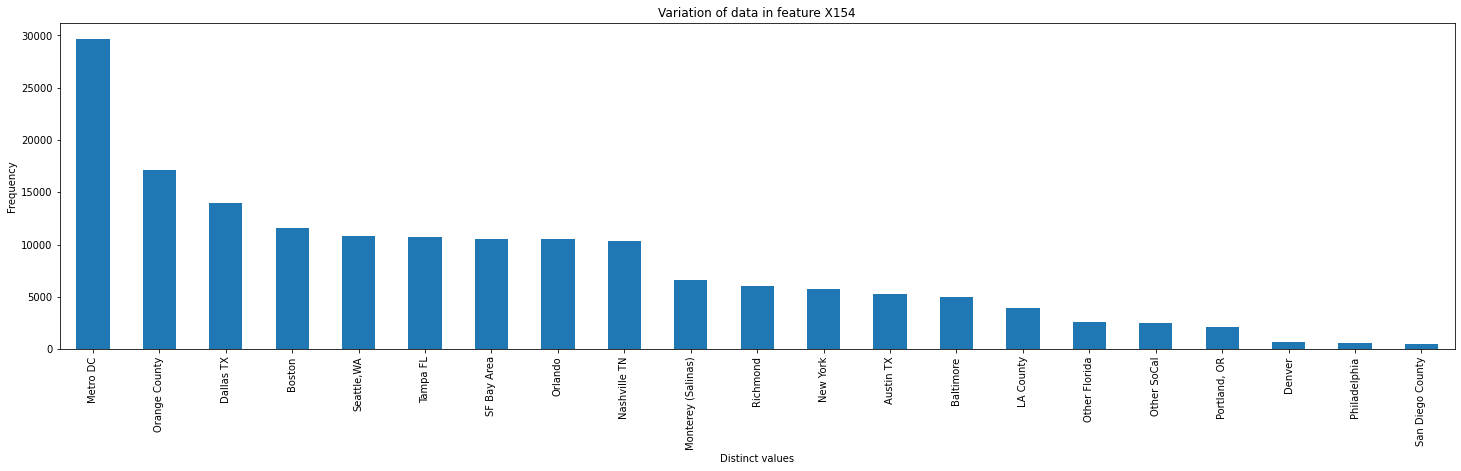

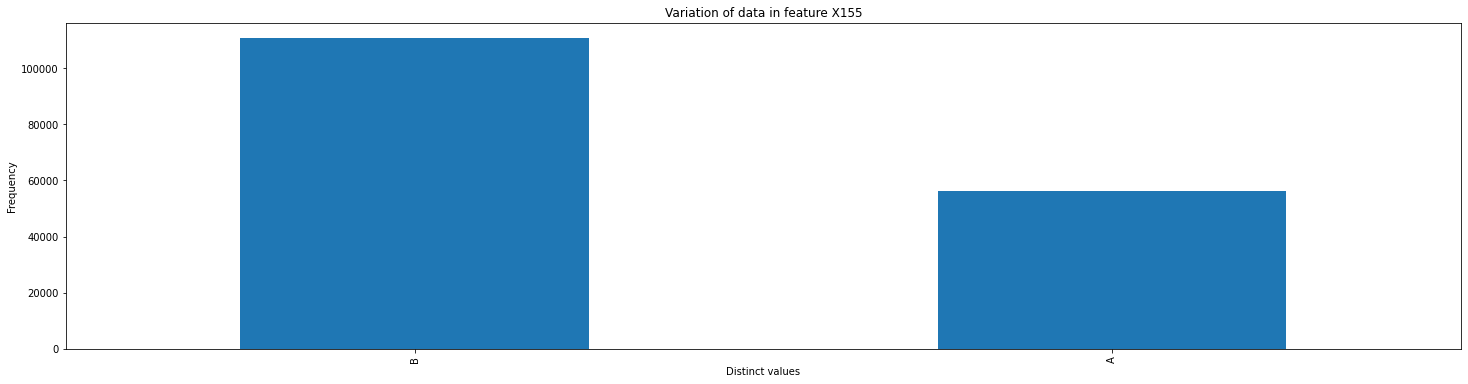

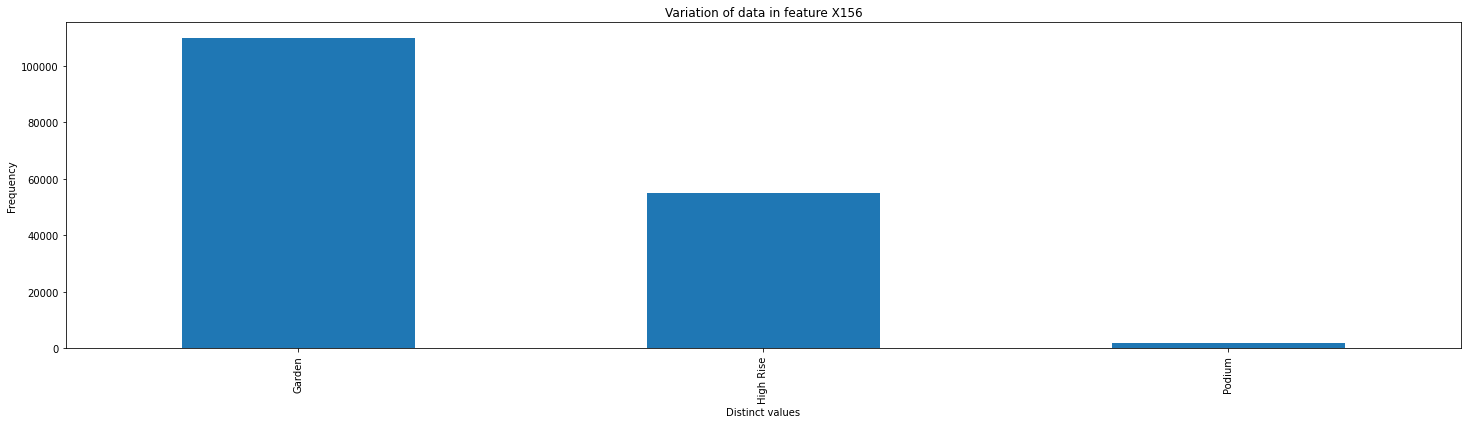

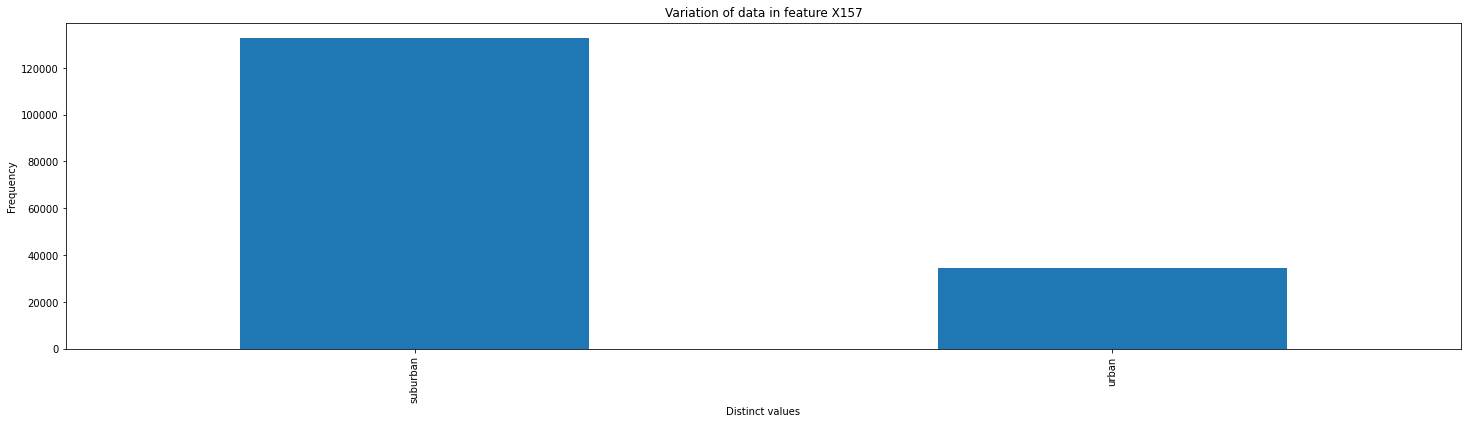

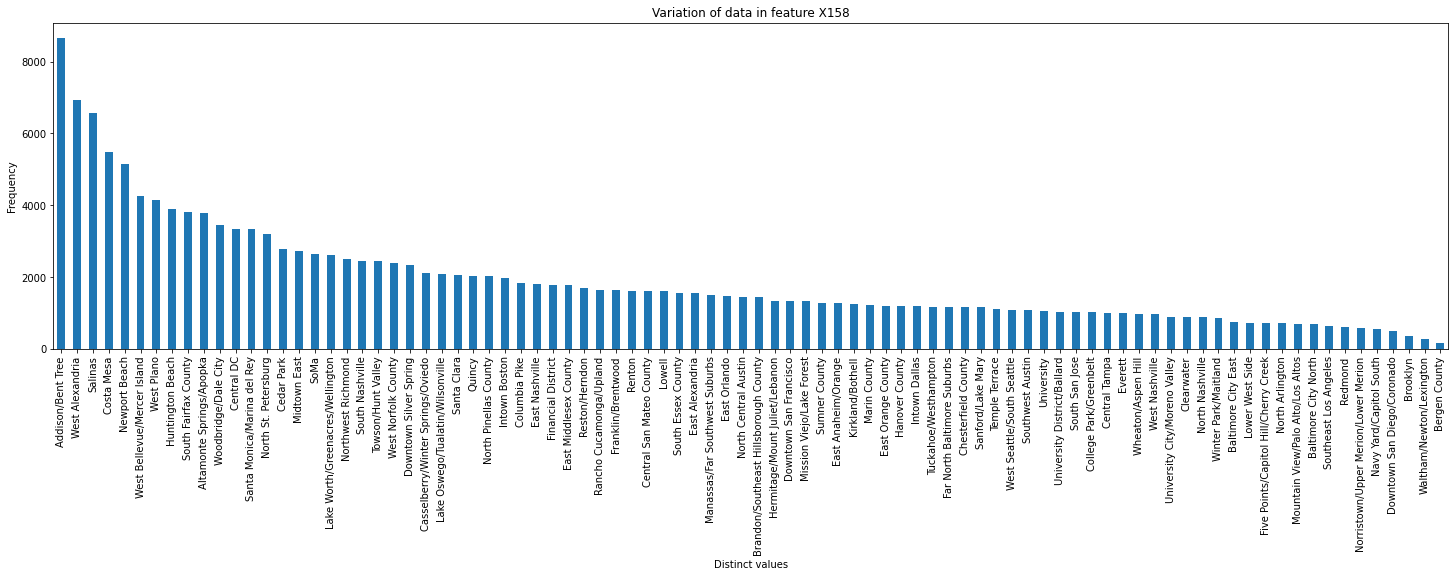

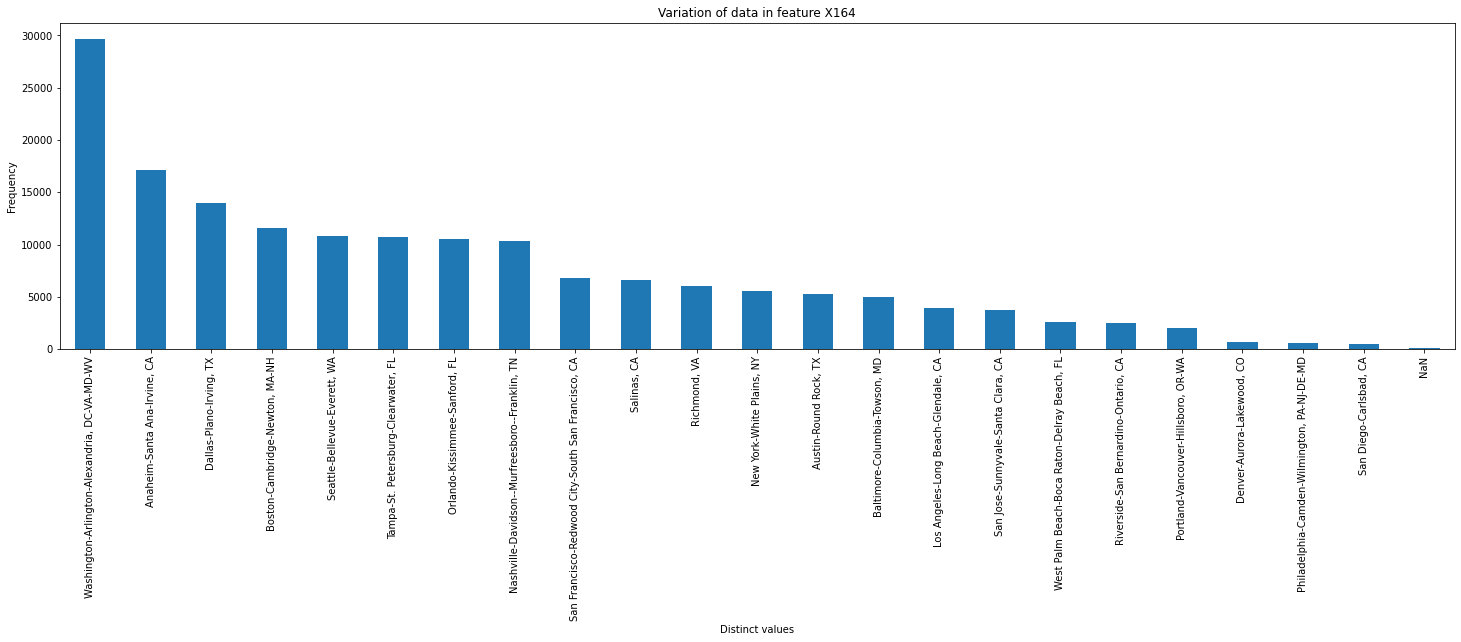

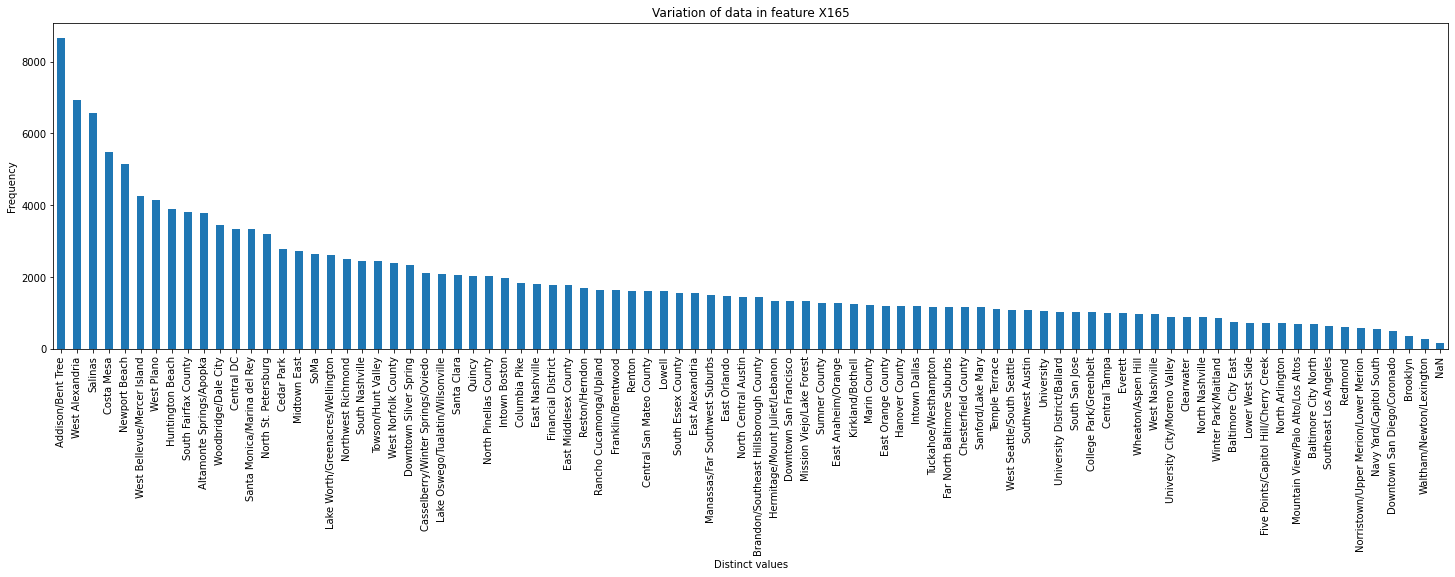

In [148]:
string_df = df[string_containing_features].fillna('NaN')
variation_of_months_in_features_having_dates(string_containing_features, string_df)

The features shown in the above graphs are following the power law, and hence can be log normalised.

What it means is, most of the data point are under the few distinct values of the features and doesn't spread evenly over all the distinct values presents in the features

In [149]:
col_with_50_percent_or_more_Nan = []
total = len(df)
for i in df.columns.values:
    nan_tot = df[i].isnull().sum()
    nan_percent = nan_tot/total * 100
    if nan_percent >= 40:
        col_with_50_percent_or_more_Nan.append([i, nan_percent])
        print(i,' ',nan_percent)

X4   50.532870314932346
X7   55.5388576218417
X8   57.22608070889714
X9   94.80301760268232
X11   100.0
X16   40.066459106693806
X99   74.1755478385822
X100   82.0416716560891
X108   64.3132558974973


<Figure size 720x288 with 0 Axes>

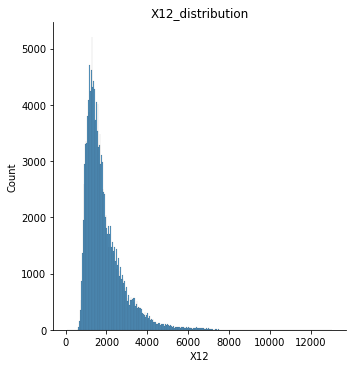

<Figure size 720x288 with 0 Axes>

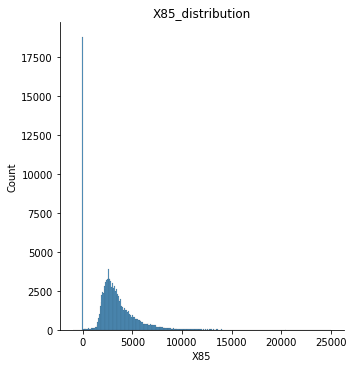

<Figure size 720x288 with 0 Axes>

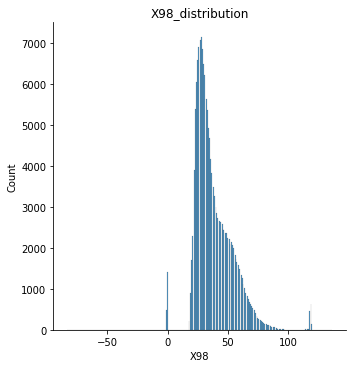

<Figure size 720x288 with 0 Axes>

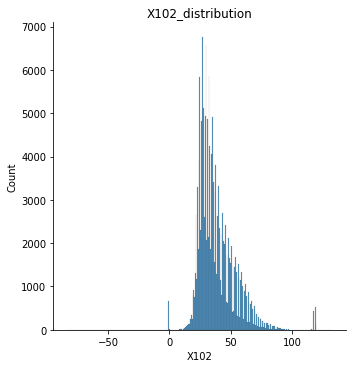

<Figure size 720x288 with 0 Axes>

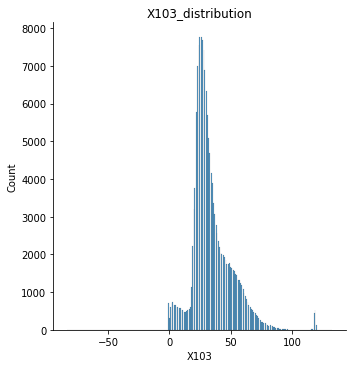

<Figure size 720x288 with 0 Axes>

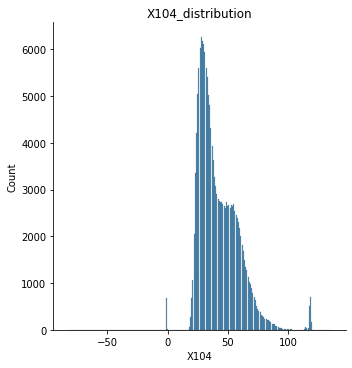

<Figure size 720x288 with 0 Axes>

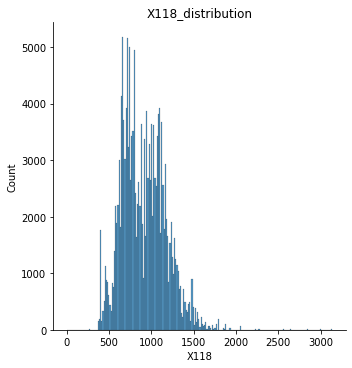

<Figure size 720x288 with 0 Axes>

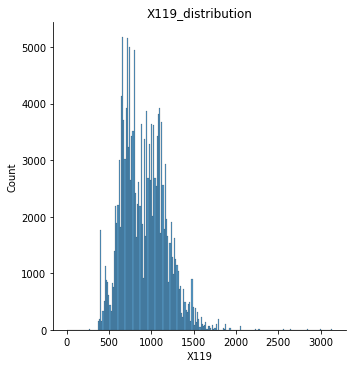

<Figure size 720x288 with 0 Axes>

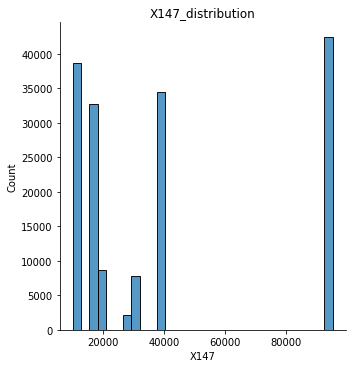

<Figure size 720x288 with 0 Axes>

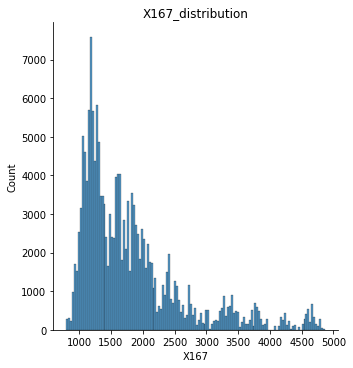

In [150]:
from pandas._config import dates
Numerical_features = ['X12','X85','X98','X102','X103','X104','X118','X119','X147','X167'] 

for feature in Numerical_features:
    plt.figure(figsize=(10,4))
    sns.displot(df[feature].dropna())
    plt.title(f'{feature}_distribution')
    plt.show()

Distribution of values in features X18, X19 and X167 seems to have Gaussian nature while curves of other features are skewed in nature.

In [28]:
df['Target_ChurnFlag'].describe()

count    167020.000000
mean          0.400665
std           0.490035
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Target_ChurnFlag, dtype: float64

In [29]:
df['Target_ChurnFlag'].value_counts()

0    100101
1     66919
Name: Target_ChurnFlag, dtype: int64

Text(0, 0.5, 'Frequency')

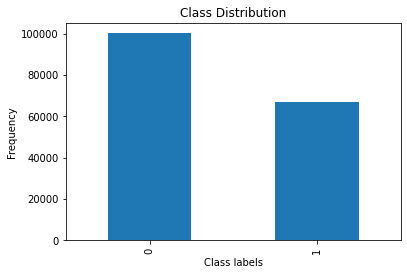

In [30]:
df['Target_ChurnFlag'].value_counts().plot.bar(title='Class Distribution')
plt.xlabel('Class labels')
plt.ylabel('Frequency')

There is data imbalance in class 0 and class 1

In [31]:
df.columns[df.isnull().any()]

Index(['X4', 'X7', 'X8', 'X9', 'X11', 'X16', 'X85', 'X99', 'X100', 'X108',
       'X164', 'X165', 'X169', 'X170'],
      dtype='object')

### Preprocessing

In [32]:
df.columns

Index(['UID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8',
       ...
       'X206', 'X207', 'X208', 'X209', 'X210', 'X211', 'X212', 'X213', 'X214',
       'X215'],
      dtype='object', length=217)

#### List of columns with more than 40% value as Nan

In [33]:
col_with_50_percent_or_more_Nan = np.array(col_with_50_percent_or_more_Nan)

In [34]:
col_with_50_percent_or_more_Nan.shape

(9, 2)

In [35]:
df.drop(col_with_50_percent_or_more_Nan[:,0], inplace=True, axis=1)

In [36]:
with pd.option_context('display.max_rows', 10, 'display.max_columns', None): 
    display(df)

,UID,X0,X1,X2,X3,X5,X6,X10,X12,X13,X14,X15,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,Target_ChurnFlag,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X101,X102,X103,X104,X105,X106,X107,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X188,X189,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215
0,1003904-3746,14 month lease,1103.0,2015-01-08,2016-02-28,2015-01-08,2015-01-08,False,1103.0,0,0,1,13,1-3 years,1,16,6,1,0,0,0,0,1,1,2016,2015-01-08,2015-07-30,0,0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2206.00,-1.0,-1.000000,1,1,1,0,1,0,1,0,0,1,25,46.120308,25.0,25,25,0,1,42000.0,9,4,8,0,0,1,1,1,2,714.0,714.0,1.0,1.0,-1,-1,-1.000000,-1,-1,-1,-1,-1.000000,-1,-1,-1,-1,15,0,9,11.133333,5,14,1,7,0.555556,5,0,9,0,40004,240,ACTIVE,Riverside,CA,92507-8463,40004,Other SoCal,B,Garden,suburban,University City/Moreno Valley,0,312,16,71,399,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,0.9535,1144.0,0.007000,2015-Q1,2015-01-01,1249.0,1249.0,0.883106,0.883106,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.466667,0.037037,0.333333,0.0,0.600000,0.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,1.0,1.544818,1.000000,1.662500,0.600000
1,1003904-3751,12 month lease,1136.0,2015-01-24,2016-01-17,2003-09-11,2003-09-11,False,1136.0,0,0,1,12,6-12 months,13,15,7,0,0,0,0,0,1,0,2016,2015-01-24,2016-01-17,0,0,1103.0,0.029918,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1,1,1,1,0,0,1,1.000000,0.000000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2272.00,-1.0,-1.000000,1,1,1,0,1,0,0,1,0,1,46,-1.000000,46.0,46,46,0,0,0.0,9,4,8,0,0,1,1,1,2,714.0,714.0,1.0,1.0,0,7,8.285714,4,12,0,16,0.176471,7,0,17,1,14,0,2,8.214286,4,13,0,16,0.176471,7,0,17,1,40004,240,ACTIVE,Riverside,CA,92507-8463,40004,Other SoCal,B,Garden,suburban,University City/Moreno Valley,0,312,16,71,399,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,0.9535,1144.0,0.007000,2015-Q1,2015-01-01,1249.0,1249.0,0.909528,0.909528,0.083333,0.083333,0.083333,0.083333,0.000000,0.000000,0.083333,0.083333,0.000000,0.083333,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.142857,0.012605,0.500000,0.0,1.214286,0.071429,1.230769,0.013575,0.538462,0.0,1.307692,0.076923,1.0,1.591036,1.000000,1.662500,0.142857
2,1003904-3756,12 month lease,1382.0,2015-02-20,2016-02-21,2015-02-20,2015-02-20,False,1382.0,0,0,1,12,6-12 months,1,14,7,1,0,0,0,0,1,0,2016,2015-02-20,2016-02-21,0,0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2764.00,-1.0,-1.000000,3,3,2,1,2,1,1,1,0,2,41,0.000000,44.0,41,47,1,2,66360.0,18,5,16,2,0,1,1,1,1,1060.0,1060.0,2.0,2.0,-1,-1,-1.000000,-1,-1,-1,-1,-1.000000,-1,-1,-1,-1,13,0,10,11.384615,6,17,1,20,0.714286,15,0,21,1,40004,240,ACTIVE,Riverside,CA,92507-8463,40004,Other SoCal,B,Garden,suburban,University City/Moreno Valley,0,312,16,71,399,"Riverside-San Bernardino-Ontario, CA",U

In [37]:
extract_time=lambda date_provided:time.mktime(datetime.datetime.strptime(date_provided, "%Y-%m-%d").timetuple())

In [38]:
df['X2']=df['X2'].map(extract_time)
df['X3']=df['X3'].map(extract_time)
df['X5']=df['X5'].map(extract_time)
df['X6']=df['X6'].map(extract_time)
df['X30']=df['X30'].map(extract_time)
df['X31']=df['X31'].map(extract_time)

In [39]:
strip_lease_month = lambda x:int(re.findall(r'-?\d+\.?\d*', x)[0])

In [40]:
df['X0']=df['X0'].map(strip_lease_month)

In [41]:
def ohe(df, label):
    le = LabelEncoder()
    return le.fit_transform(df[label].values)
    

In [42]:
df['X18']=ohe(df, 'X18') # contains two distinct labels
df['X29']=ohe(df, 'X29') # contains 8 distinct labels
df['X170']=ohe(df, 'X170') # contains 27 distinct labels basically dates but with nan
df['X147']=ohe(df, 'X147')
df['X148']=ohe(df, 'X148')
df['X150']=ohe(df, 'X150')
df['X151']=ohe(df, 'X151')
df['X152']=ohe(df, 'X152')
df['X153']=ohe(df, 'X153')
df['X154']=ohe(df, 'X154')
df['X155']=ohe(df, 'X155')
df['X156']=ohe(df, 'X156')
df['X157']=ohe(df, 'X157')
df['X158']=ohe(df, 'X158')
df['X164']=ohe(df, 'X164')
df['X165']=ohe(df, 'X165')
df['X169']=ohe(df, 'X169')

In [43]:
# it contains only the date values but with Nan in it
# more over the number of distinct values are also 
# less in it, thus using ohe here
df['X170']=ohe(df, 'X170')

In [44]:
# droping columns containing same value for all the data points
df.drop(columns_with_one_value, axis=1, inplace=True)

In [45]:
# replacing Nan with median values, as it didn't
# get affected with outliers
df['X85'].fillna(df['X85'].median(), inplace=True)

In [46]:
int(False)

0

In [47]:
with pd.option_context('display.max_rows', 10, 'display.max_columns', None): 
    display(df)

,UID,X0,X1,X2,X3,X5,X6,X12,X17,X18,X19,X20,X21,X22,X23,X24,Target_ChurnFlag,X29,X30,X31,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X47,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X101,X102,X103,X104,X105,X106,X107,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X187,X188,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215
0,1003904-3746,14,1103.0,1.420675e+09,1.456618e+09,1.420675e+09,1.420675e+09,1103.0,13,0,1,16,6,1,0,0,1,1,1.420675e+09,1.438214e+09,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2206.00,-1.0,-1.000000,1,1,1,0,1,0,1,0,0,1,25,46.120308,25.0,25,25,0,1,42000.0,9,4,8,0,0,1,1,1,2,714.0,714.0,1.0,1.0,-1,-1,-1.000000,-1,-1,-1,-1,-1.000000,-1,-1,-1,-1,15,0,9,11.133333,5,14,1,7,0.555556,5,0,9,0,80,43,55,0,90,80,13,1,0,0,76,0,312,16,71,399,13,75,0.9535,1144.0,0.007000,0,0,1249.0,1249.0,0.883106,0.883106,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.466667,0.037037,0.333333,0.0,0.600000,0.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,1.0,1.544818,1.000000,1.662500,0.600000
1,1003904-3751,12,1136.0,1.422058e+09,1.452989e+09,1.063238e+09,1.063238e+09,1136.0,12,1,13,15,7,0,0,0,0,1,1.422058e+09,1.452989e+09,1103.0,0.029918,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1,1,1,1,0,0,1,1.000000,0.000000,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2272.00,-1.0,-1.000000,1,1,1,0,1,0,0,1,0,1,46,-1.000000,46.0,46,46,0,0,0.0,9,4,8,0,0,1,1,1,2,714.0,714.0,1.0,1.0,0,7,8.285714,4,12,0,16,0.176471,7,0,17,1,14,0,2,8.214286,4,13,0,16,0.176471,7,0,17,1,80,43,55,0,90,80,13,1,0,0,76,0,312,16,71,399,13,75,0.9535,1144.0,0.007000,0,0,1249.0,1249.0,0.909528,0.909528,0.083333,0.083333,0.083333,0.083333,0.000000,0.000000,0.083333,0.083333,0.000000,0.083333,0.0,0.0,0.0,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.142857,0.012605,0.500000,0.0,1.214286,0.071429,1.230769,0.013575,0.538462,0.0,1.307692,0.076923,1.0,1.591036,1.000000,1.662500,0.142857
2,1003904-3756,12,1382.0,1.424390e+09,1.456013e+09,1.424390e+09,1.424390e+09,1382.0,12,1,1,14,7,1,0,0,0,1,1.424390e+09,1.456013e+09,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2764.00,-1.0,-1.000000,3,3,2,1,2,1,1,1,0,2,41,0.000000,44.0,41,47,1,2,66360.0,18,5,16,2,0,1,1,1,1,1060.0,1060.0,2.0,2.0,-1,-1,-1.000000,-1,-1,-1,-1,-1.000000,-1,-1,-1,-1,13,0,10,11.384615,6,17,1,20,0.714286,15,0,21,1,80,43,55,0,90,80,13,1,0,0,76,0,312,16,71,399,13,75,0.9535,1144.0,0.007000,0,0,1472.0,1472.0,0.938859,0.938859,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.538462,0.054945,1.153846,0.0,1.615385,0.076923,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,1.0,1.303774,0.666667,1.662500,0.769231
3,1003904-3759,14,2417.0,1.423181e+09,1.459642e+09,1.423181e+09,1.423181e+09,1135.0,14,0,1,13,8,1,0,0,1,1,1.423181e+09,1.459728e+09,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,5,6,2,6,3,0,2,1.666667,0.666667,6,0,0,0,0,4,0,1,0

In [48]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [49]:
df.columns

Index(['UID', 'X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X12', 'X17', 'X18',
       ...
       'X206', 'X207', 'X208', 'X209', 'X210', 'X211', 'X212', 'X213', 'X214',
       'X215'],
      dtype='object', length=191)

In [50]:
X = df.drop(['UID', 'Target_ChurnFlag'], axis=1).to_numpy()
Y = df['Target_ChurnFlag'].to_numpy()
print(X.shape, Y.shape)

(167020, 189) (167020,)


#### Creating Model

#### Handling dataset imbalance 

In [51]:
sm = SMOTE(sampling_strategy='minority', random_state=42)

In [52]:
oversampled_X, oversampled_Y = sm.fit_resample(X, Y)

In [53]:
(oversampled_Y==1).sum(),(oversampled_Y==0).sum()

(100101, 100101)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(oversampled_X, oversampled_Y, test_size=0.2, random_state=42)

In [55]:
x_train.shape, x_test.shape

((160161, 189), (40041, 189))

In [56]:
train_scaler = StandardScaler()
test_scaler = StandardScaler()
x_train=train_scaler.fit_transform(x_train)
x_test=test_scaler.fit_transform(x_test)

In [57]:
x_train.shape, x_test.shape

((160161, 189), (40041, 189))

### Applying PCA to reduce unnecessary features

In [58]:
from sklearn.decomposition import PCA# Make an instance of the Model
pca = PCA(.98)

In [59]:
pca.fit(x_train)

PCA(n_components=0.98)

In [60]:
pca.n_components_

99

In [61]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [62]:
np.logspace(-3,3,7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

### Creating Logistic regression model

In [63]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train_pca,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.6232478313345517


In [64]:
logreg_cv.best_estimator_

LogisticRegression(C=0.001)

In [65]:
y_test.shape

(40041,)

In [66]:
logreg_cv.best_estimator_.score(x_test_pca,y_test)

0.6213381284183712

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


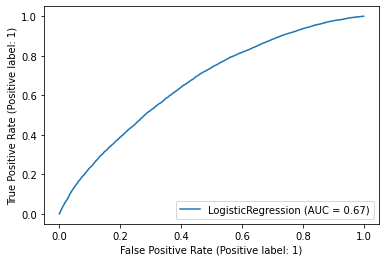

In [67]:
from sklearn import metrics
metrics.plot_roc_curve(logreg_cv.best_estimator_, x_test_pca, y_test)
plt.show()

In [68]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_pca, y_train)



GaussianNB()

In [69]:
gnb.score(x_test_pca,y_test)

0.5739866636697385

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


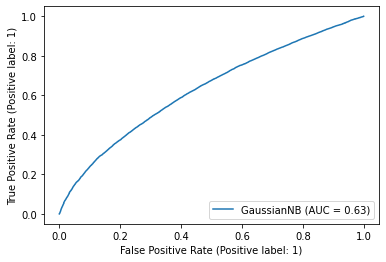

In [70]:
metrics.plot_roc_curve(gnb, x_test_pca, y_test)
plt.show()

In [71]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import accuracy_score




space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }



def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( x_train_pca, y_train), ( x_test_pca, y_test)]
    
    clf.fit(x_train_pca, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(x_test_pca)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }





In [72]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:
0.5940910566669164
SCORE:
0.5940161334632003
SCORE:
0.5950900327164657
SCORE:
0.5944656726854973
SCORE:
0.5927674134012637
SCORE:
0.5959391623585825
SCORE:
0.5937913638520517
SCORE:
0.5930421318148897
SCORE:
0.5948652631053171
SCORE:
0.5938912614570065
SCORE:
0.5935665942409031
SCORE:
0.5941659798706326
SCORE:
0.593291875827277
SCORE:
0.5949152119077945
SCORE:
0.5931420294198446
SCORE:
0.5928673110062186
SCORE:
0.5934666966359482
SCORE:
0.5930671062161285
SCORE:
0.593666491845858
SCORE:
0.5921930021727729
SCORE:
0.595889213556105
SCORE:
0.5950900327164657
SCORE:
0.595239879123898
SCORE:
0.5952648535251367
SCORE:
0.595614495142479
SCORE:
0.5960640343647761
SCORE:
0.594490647086736
SCORE:
0.5951150071177044
SCORE:
0.5951899303214205
SCORE:
0.5956644439449564
SCORE:
0.5941909542718713
SCORE:
0.5954396743338078
SCORE:
0.5935166454384256
SCORE:
0.5929172598086961
SCORE:
0.5944157238830199
SCORE:
0.5947653655003621
SCORE:
0.5949152119077945
SCORE:
0.5959391623585825
SCORE:
0.595814290

In [73]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.5818603905437738, 'gamma': 3.7642625981560784, 'max_depth': 4.0, 'min_child_weight': 9.0, 'reg_alpha': 46.0, 'reg_lambda': 0.6434207575507724}


**The Best performed model is Logistic Regression with AUC of 0.67**

### Pedciting Probabilities of the train data and test data and plotting their distributions

In [74]:
x_train_prob = logreg_cv.best_estimator_.predict_proba(x_train_pca)
x_test_prob = logreg_cv.best_estimator_.predict_proba(x_test_pca)

<Figure size 720x288 with 0 Axes>

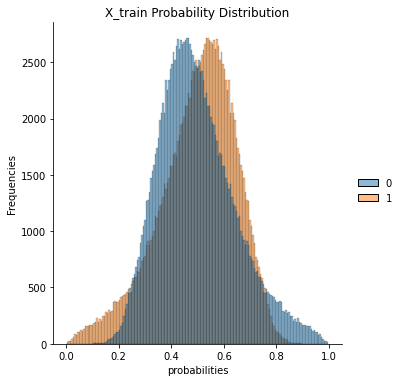

In [77]:
 plt.figure(figsize=(10,4))
 sns.displot(x_train_prob)
 plt.title(f'X_train Probability Distribution')
 plt.xlabel('probabilities')
 plt.ylabel('Frequencies')
 plt.show()

<Figure size 720x288 with 0 Axes>

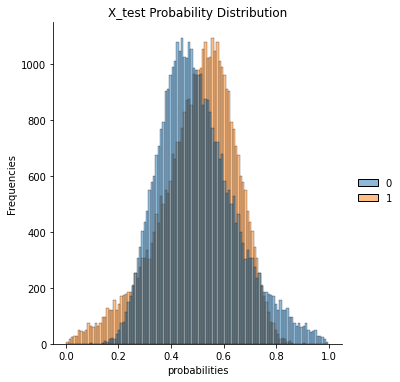

In [76]:
 plt.figure(figsize=(10,4))
 sns.displot(x_test_prob)
 plt.title(f'X_test Probability Distribution')
 plt.xlabel('probabilities')
 plt.ylabel('Frequencies')
 plt.show()